* Source Blog for Vader Sentiment: https://www.pingshiuanchua.com/blog/post/simple-sentiment-analysis-python?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com
* Source code for Text Blog: https://github.com/Prianca25/Machine-Learning/blob/master/Amazon%20Fine%20Food%20Review.ipynb
* Source dataset: Ceiling fans review dataset (BuzzJun20) provided by placement company

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Load NLTK TextBlob
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kdurbha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/kdurbha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
# Load dataset
import pandas as pd
df1=pd.read_csv("BuzzJun20.csv")
df1.head()

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,Excellent fan for an excellent price ...,24-Apr-18,5,Excellent fan for an excellent price
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,I put these fans in my spec houses and everyon...,15-Oct-19,5,I put these fans in my spec houses and everyon...
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,5 Star Review,03-Jul-19,5,Rating provided by a verified purchaser
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,"Easy to put together, our 3rd purchase for th...",17-Jan-19,5,"Easy to put together, our 3rd purchase for th..."
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,This fan it was easily to install and it is...,09-Feb-19,5,This fan it was easily to install and it is a ...


In [28]:
#Study the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rev_id                      1188 non-null   int64  
 1   Retailer                    1188 non-null   object 
 2   Division                    1188 non-null   object 
 3   Category                    1188 non-null   object 
 4   Department                  1188 non-null   object 
 5   Product_URL                 1188 non-null   object 
 6   Brand                       1068 non-null   object 
 7   Product_Name                1188 non-null   object 
 8   Final_Price_after_Discount  1188 non-null   float64
 9   Review_Link                 1188 non-null   object 
 10  Review_Header               1162 non-null   object 
 11  Review_Creation_Date        1188 non-null   object 
 12  Review_Rating_Score         1188 non-null   int64  
 13  Review_Text                 1188 

In [29]:
df1.Review_Header.head()

0             Excellent fan for an excellent price ...
1    I put these fans in my spec houses and everyon...
2                                        5 Star Review
3    Easy to put together, our 3rd purchase  for th...
4       This fan it was easily to install and it is...
Name: Review_Header, dtype: object

In [30]:
#Check for null values
# Check for null values
pd.isna(df1).sum()

Rev_id                          0
Retailer                        0
Division                        0
Category                        0
Department                      0
Product_URL                     0
Brand                         120
Product_Name                    0
Final_Price_after_Discount      0
Review_Link                     0
Review_Header                  26
Review_Creation_Date            0
Review_Rating_Score             0
Review_Text                     0
dtype: int64

In [31]:
# Null values are in columns which are not relevant for our analysis
# We will use Review_Text for Wordclouds & Review_Rating_Score for scores
# We will also later extract comments & use NLTK Vader library for Sentiment Analysis of this
#Extract comments column & clean up
comments = df1['Review_Text']

# Lower casing and removing punctuations
df1['Review_Text'] = df1['Review_Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))
df1['Review_Text'] = df1['Review_Text'].str.replace('[^\w\s]', "")
df1.Review_Text.head()

<ipython-input-31-9cd0f6f6f49e>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Review_Text'] = df1['Review_Text'].str.replace('[^\w\s]', "")


0                 excellent fan for an excellent price
1    i put these fans in my spec houses and everyon...
2              rating provided by a verified purchaser
3    easy to put together our 3rd purchase for this...
4    this fan it was easily to install and it is a ...
Name: Review_Text, dtype: object

In [32]:
# Remove Stopwords
stop = stopwords.words('english')
df1['Review_Text'] = df1['Review_Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df1.Review_Text.head()

0                        excellent fan excellent price
1    put fans spec houses everyone likes like price...
2                   rating provided verified purchaser
3    easy put together 3rd purchase brand 3 rooms f...
4                   fan easily install beautiful model
Name: Review_Text, dtype: object

In [33]:
# Lemmatization to correct spelling errors
# But we need to download the corpus of textblob. 
# From python terminal install with below command (commented line below)
# python -m textblob.download_corpora

df1['Review_Text'] = df1['Review_Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df1.Review_Text.head()

0                        excellent fan excellent price
1    put fan spec house everyone like like price va...
2                   rating provided verified purchaser
3    easy put together 3rd purchase brand 3 room fa...
4                   fan easily install beautiful model
Name: Review_Text, dtype: object

### Word cloud analysis for Review_Header for Positive & Negative scores
* Positive scores are assumed to be 4&5 under Review_Rating_Score
* Negative scores are assumed to be 1&2 under Review_Rating_Score

In [34]:
# Import & build word cloud for the Review_Text words
# Remember you must have WordCloud installed. If not in terminal window run below command
# python -m pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

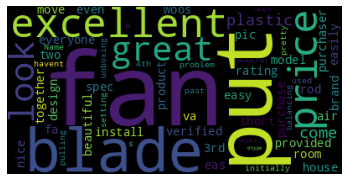

In [35]:
# Simple Word cloud
wordcloud = WordCloud().generate(str(comments))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
# From the dataset let us study the Review_Ratings_Score vs. Review_Text comments
# Explore ratings scores for various fans
df1.Review_Rating_Score.value_counts()

5    766
4    206
1    101
3     66
2     49
Name: Review_Rating_Score, dtype: int64

In [37]:
df1.columns

Index(['Rev_id', 'Retailer', 'Division', 'Category', 'Department',
       'Product_URL', 'Brand', 'Product_Name', 'Final_Price_after_Discount',
       'Review_Link', 'Review_Header', 'Review_Creation_Date',
       'Review_Rating_Score', 'Review_Text'],
      dtype='object')

<Axes: xlabel='Review_Rating_Score', ylabel='count'>

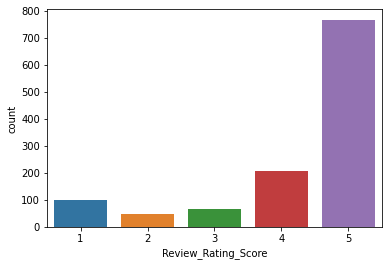

In [38]:
# For visualisation use Seaborn as sns
import seaborn as sns
# Let us plot the distribution of review scores
sns.countplot(data = df1, x = 'Review_Rating_Score')

In [39]:
# Explore review_rating_score further by concatenating the scores in new dataframe df2
df2=df1
score_1 = df2[df2['Review_Rating_Score'] == 1]
score_2 = df2[df2['Review_Rating_Score'] == 2]
score_3 = df2[df2['Review_Rating_Score'] == 3]
score_4 = df2[df2['Review_Rating_Score'] == 4]
score_5 = df2[df2['Review_Rating_Score'] == 5]
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [40]:
# Now let's split the data into Negative (Review_Rating_Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Review_Rating_Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Review_Rating_Score'].isin([4,5]) ]

In [41]:
# Transform to single string under the column Review_Header in dataset
negative_reviews_str = negative_reviews.Review_Header.str.cat()
positive_reviews_str = positive_reviews.Review_Header.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Scores')

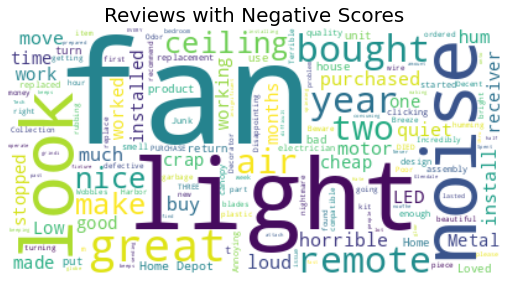

In [42]:
# Word cloud for negative reviews
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

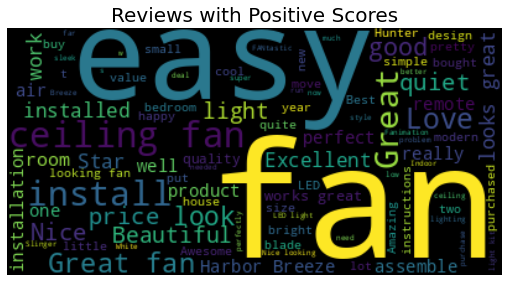

In [19]:
# Word cloud for positive reviews
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

### Sentiment Analysis using Vader Sentiment

In [20]:
# Load Vader sentiment from NLTK
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kdurbha/nltk_data...


True

In [21]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [22]:
nltk_results = [nltk_sentiment(row) for row in comments]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(df1, columns = ['Review_Text'])
nltk_df = text_df.join(results_df)
nltk_df

,Review_Text,neg,neu,pos,compound
0,excellent fan excellent price,0.000,0.093,0.907,0.8658
1,put fan spec house everyone like like price va...,0.000,0.508,0.492,0.8271
2,rating provided verified purchaser,0.000,1.000,0.000,0.0000
3,easy put together 3rd purchase brand 3 room fa...,0.000,0.390,0.610,0.8555
4,fan easily install beautiful model,0.000,0.189,0.811,0.8225
...,...,...,...,...,...
1183,great product nice look even blade plastic eas...,0.000,0.380,0.620,0.8689
1184,move air blade plastic woos come short rod pic...,0.134,0.743,0.124,-0.0516
1185,like design two blade problem balancing come b...,0.090,0.693,0.217,0.7579
1186,fan look great put initially unboxing pulling ...,0.000,0.478,0.522,0.9722


In [23]:
# Convert scores into positive and negetive sentiments using some threshold
nltk_df['Sentiment'] = np.where(nltk_df['compound'] >= 0 , 'Positive','Negative')
nltk_df.tail()

,Review_Text,neg,neu,pos,compound,Sentiment
1183,great product nice look even blade plastic eas...,0.000,0.380,0.620,0.8689,Positive
1184,move air blade plastic woos come short rod pic...,0.134,0.743,0.124,-0.0516,Negative
1185,like design two blade problem balancing come b...,0.090,0.693,0.217,0.7579,Positive
1186,fan look great put initially unboxing pulling ...,0.000,0.478,0.522,0.9722,Positive
1187,fan like havent used past 4th setting pretty s...,0.000,0.469,0.531,0.8834,Positive


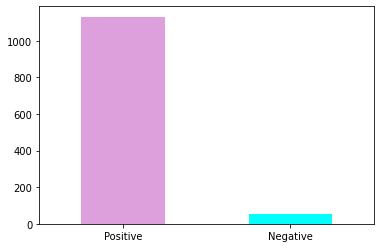

In [24]:
result=nltk_df['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);